In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, accuracy_score, f1_score
)
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("METABRIC_RNA_Mutation.csv")
df

C:\Users\tanay\AppData\Local\Temp\ipykernel_5656\2459706507.py:1: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("METABRIC_RNA_Mutation.csv")


,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,7295,43.10,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,LumA,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1900,7296,42.88,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1901,7297,62.90,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1902,7298,61.16,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(1904, 693)

In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 693 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    patient_id                      int64  
 1    age_at_diagnosis                float64
 2    type_of_breast_surgery          object 
 3    cancer_type                     object 
 4    cancer_type_detailed            object 
 5    cellularity                     object 
 6    chemotherapy                    int64  
 7    pam50_+_claudin-low_subtype     object 
 8    cohort                          float64
 9    er_status_measured_by_ihc       object 
 10   er_status                       object 
 11   neoplasm_histologic_grade       float64
 12   her2_status_measured_by_snp6    object 
 13   her2_status                     object 
 14   tumor_other_histologic_subtype  object 
 15   hormone_therapy                 int64  
 16   inferred_menopausal_state       object 
 17   integrative_

In [5]:
df.sample(5)

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
1426,5534,80.09,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,claudin-low,3.0,Positve,...,0,0,0,0,0,0,0,0,0,0
757,3840,53.89,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,2.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1778,7122,83.39,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,Basal,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1634,6271,64.40,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,5.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1651,6314,68.57,BREAST CONSERVING,Breast Cancer,Breast Invasive Mixed Mucinous Carcinoma,High,0,Her2,5.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df = df.set_index('patient_id')

In [7]:
df_expression = df.iloc[:,30:519].join(df['overall_survival'], how='inner')
df_expression

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7,overall_survival
patient_id,,,,,,,,,,,,,,,,,,,,,
0,-1.3990,-0.5738,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,-0.8578,...,-0.0194,-1.6345,-0.2142,-0.5698,-1.1741,-1.4779,-0.5954,-0.8847,-0.3354,1
2,-1.3800,0.2777,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,-2.6059,...,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920,1
5,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,-1.1305,...,0.0668,0.8344,1.7227,0.4024,-3.7172,-1.5538,1.3701,-0.1078,0.3655,0
6,0.6744,-0.5428,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,-0.6165,...,-0.7078,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,-0.4828,1
8,1.2932,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,...,-0.3544,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,1.3223,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7295,0.1563,0.5543,-0.6149,0.4572,1.3822,-0.0537,-0.1323,0.2837,-0.0726,-0.5500,...,1.5304,1.1196,0.8116,0.0958,-1.2644,-0.3566,-0.2615,-0.6371,-0.5540,1
7296,0.1343,0.9128,1.3017,0.7383,0.1841,0.0028,0.1243,2.2040,-0.6190,-0.8681,...,-0.6610,-0.1610,0.2251,0.5127,-0.3412,-1.0703,-0.6950,0.0641,-0.8863,0
7297,1.8107,-0.2608,0.4006,-0.2985,0.0356,-0.1620,1.5486,1.5309,-1.3653,-0.2529,...,-0.5194,2.3968,0.5917,-0.8643,-1.3541,-1.8076,-0.1840,0.0967,-0.6264,0


In [8]:
metrics_summary = {"Model": [], "F1 Score": [], "Accuracy": []}


=== Logistic Regression ===
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.65      0.65       343
           1       0.48      0.49      0.49       229

    accuracy                           0.59       572
   macro avg       0.57      0.57      0.57       572
weighted avg       0.59      0.59      0.59       572

Accuracy: 0.5857
F1 Score: 0.5864


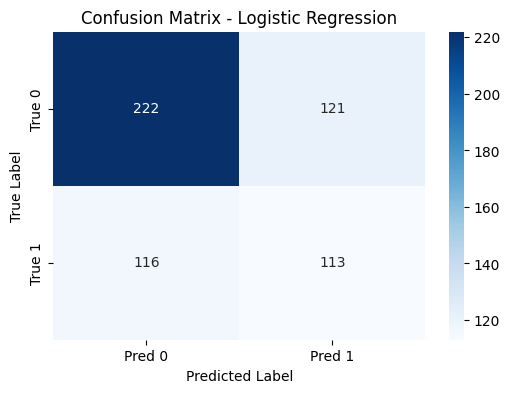

AUC-ROC Score: 0.5946

=== Random Forest ===
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.78      0.71       343
           1       0.52      0.36      0.42       229

    accuracy                           0.61       572
   macro avg       0.58      0.57      0.56       572
weighted avg       0.59      0.61      0.59       572

Accuracy: 0.6101
F1 Score: 0.5927


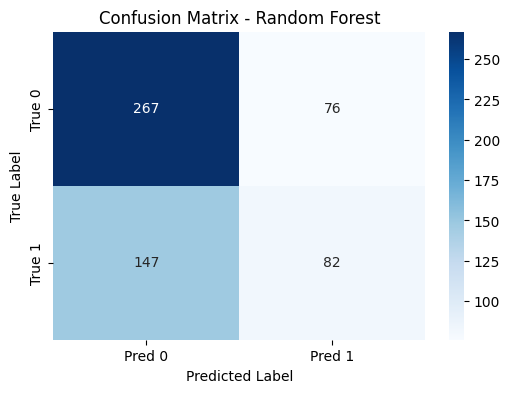

AUC-ROC Score: 0.6323

=== Gradient Boosting ===
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.75      0.71       343
           1       0.56      0.48      0.52       229

    accuracy                           0.64       572
   macro avg       0.62      0.62      0.62       572
weighted avg       0.63      0.64      0.64       572

Accuracy: 0.6416
F1 Score: 0.6363


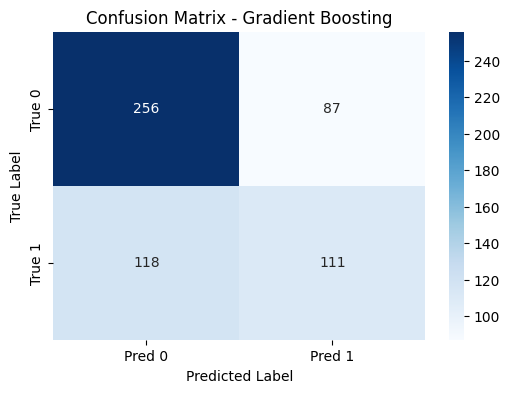

AUC-ROC Score: 0.6498


C:\Users\tanay\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



=== AdaBoost ===
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.69      0.69       343
           1       0.52      0.51      0.52       229

    accuracy                           0.62       572
   macro avg       0.60      0.60      0.60       572
weighted avg       0.62      0.62      0.62       572

Accuracy: 0.6189
F1 Score: 0.6177


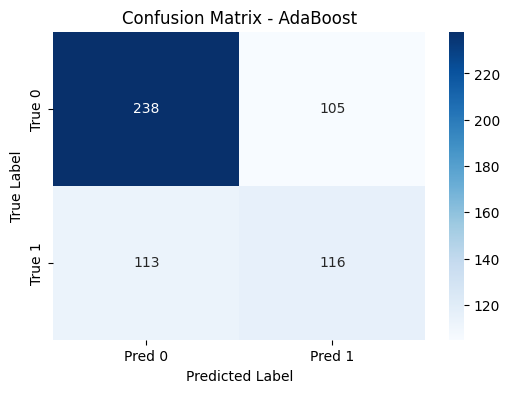

AUC-ROC Score: 0.6280

=== K-Nearest Neighbors ===
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.65      0.66       343
           1       0.50      0.53      0.52       229

    accuracy                           0.60       572
   macro avg       0.59      0.59      0.59       572
weighted avg       0.61      0.60      0.60       572

Accuracy: 0.6031
F1 Score: 0.6046


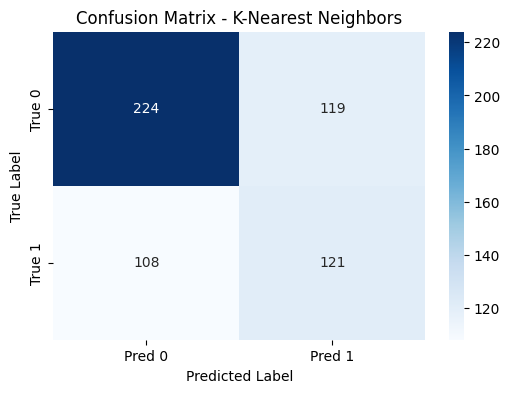

AUC-ROC Score: 0.6137

=== Support Vector Classifier ===
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.79      0.73       343
           1       0.59      0.45      0.51       229

    accuracy                           0.66       572
   macro avg       0.64      0.62      0.62       572
weighted avg       0.65      0.66      0.65       572

Accuracy: 0.6556
F1 Score: 0.6454


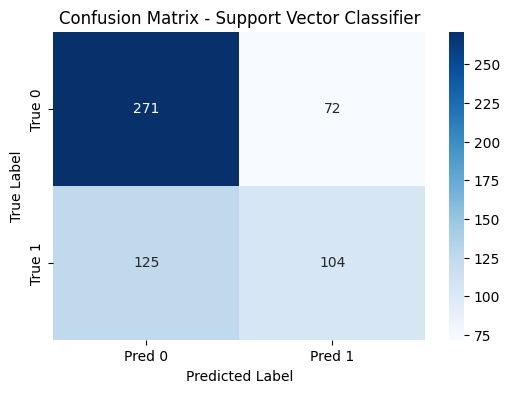

AUC-ROC Score: 0.6741

=== Decision Tree ===
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.59      0.61       343
           1       0.44      0.48      0.46       229

    accuracy                           0.55       572
   macro avg       0.54      0.54      0.54       572
weighted avg       0.55      0.55      0.55       572

Accuracy: 0.5472
F1 Score: 0.5502


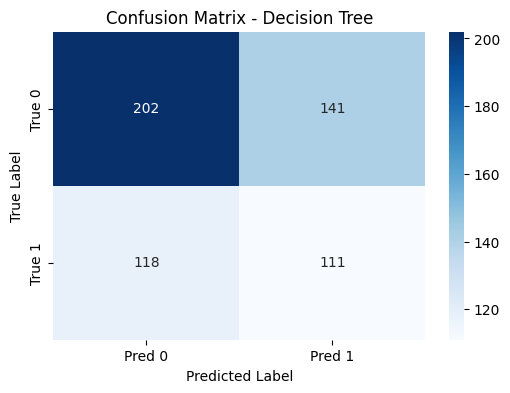

AUC-ROC Score: 0.5368


C:\Users\tanay\AppData\Local\Temp\ipykernel_5656\3697332949.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_summary["Model"],


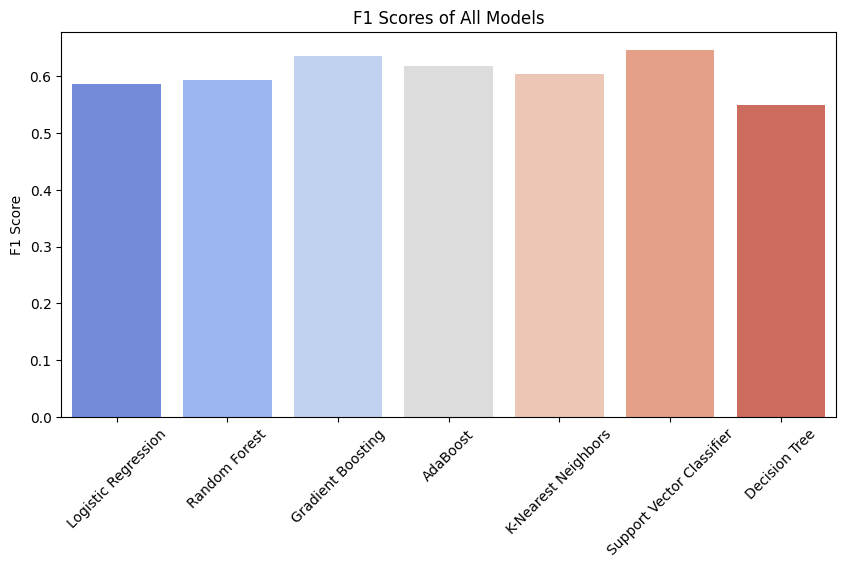

C:\Users\tanay\AppData\Local\Temp\ipykernel_5656\3697332949.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_summary["Model"],


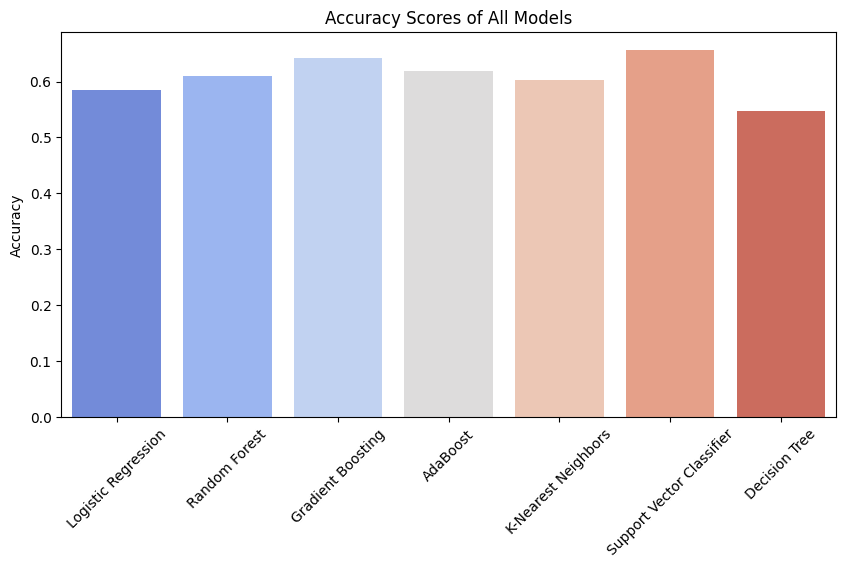

In [9]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)

    # Predictions and probabilities (if applicable)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(
        model, 'predict_proba') else None

    # Calculate metrics
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)

    # Store the metrics
    metrics_summary["Model"].append(model_name)
    metrics_summary["F1 Score"].append(f1)
    metrics_summary["Accuracy"].append(accuracy)

    # Display classification metrics
    print(f"\n=== {model_name} ===")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion Matrix Visualization
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[
                'Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # AUC-ROC Score (if applicable)
    if y_proba is not None:
        print(f"AUC-ROC Score: {roc_auc_score(y_test, y_proba):.4f}")

def main(df, target_column):
    # Prepare the dataset
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    #Handle categorical variables
    X = pd.get_dummies(X, drop_first=True)
    if y.dtype == 'object':
        y = LabelEncoder().fit_transform(y)

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42)

    # Define classifiers to be evaluated
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Random Forest': RandomForestClassifier(),
        'Gradient Boosting': GradientBoostingClassifier(),
        'AdaBoost': AdaBoostClassifier(),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Support Vector Classifier': SVC(probability=True),
        'Decision Tree': DecisionTreeClassifier()
    }

    # Train and evaluate all models
    for name, model in models.items():
        evaluate_model(model, X_train, X_test, y_train, y_test, name)

    # Plot F1 Scores of all models
    plt.figure(figsize=(10, 5))
    sns.barplot(x=metrics_summary["Model"],
                y=metrics_summary["F1 Score"], palette='coolwarm')
    plt.xticks(rotation=45)
    plt.title('F1 Scores of All Models')
    plt.ylabel('F1 Score')
    plt.show()

    # Plot Accuracy Scores of all models
    plt.figure(figsize=(10, 5))
    sns.barplot(x=metrics_summary["Model"],
                y=metrics_summary["Accuracy"], palette='coolwarm')
    plt.xticks(rotation=45)
    plt.title('Accuracy Scores of All Models')
    plt.ylabel('Accuracy')
    plt.show()


# Load your dataset and specify the target column
if __name__ == "__main__":
    # Replace with your dataframe
    df = df_expression  # Example input dataframe
    target_column = 'overall_survival'  # Replace with the actual target column name
    main(df, target_column)
